In [32]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [33]:
# Import data into Pandas as a data frame
df = pd.read_csv('./iris_2_classes.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class_label,Actual_label
0,5.1,3.5,1.4,0.2,1,Iris-setosa
1,4.9,3.0,1.4,0.2,1,Iris-setosa
2,4.7,3.2,1.3,0.2,1,Iris-setosa
3,4.6,3.1,1.5,0.2,1,Iris-setosa
4,5.0,3.6,1.4,0.2,1,Iris-setosa


In [34]:
# Perform some exploratory analyses
# Find average cluster center for setosas
df_setosa = df[df["class_label"] == 1]
df_setosa.head(5)
print("Average sepal_width for setosas =  %.3f" % (np.mean(df_setosa["sepal_width"])))
print("Average petal_width for setosas =  %.3f" %  (np.mean(df_setosa["petal_width"])))
# Now for versicolor
df_versi = df[df["class_label"] == 0]
df_versi.head(5)
print("Average sepal_width for versicolors =  %.3f" % (np.mean(df_versi["sepal_width"])))
print("Average petal_width for versicolors =  %.3f" % (np.mean(df_versi["petal_width"])))


Average sepal_width for setosas =  3.418
Average petal_width for setosas =  0.244
Average sepal_width for versicolors =  2.770
Average petal_width for versicolors =  1.326


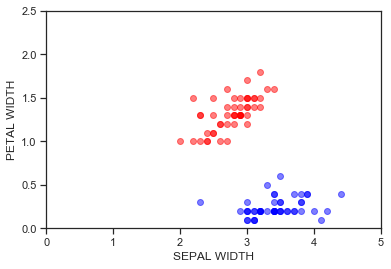

In [35]:
# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing random state for reproducibility
plt.scatter(df_setosa["sepal_width"], y = df_setosa["petal_width"], marker = 'o',color = 'blue', alpha=0.5)
plt.scatter(df_versi["sepal_width"], y = df_versi["petal_width"], marker ='o',color = 'red', alpha=0.5)
plt.xlabel("SEPAL WIDTH")
plt.ylabel("PETAL WIDTH")
plt.ylim(0,2.5)
plt.xlim(0,5)
plt.show()

In [36]:
df["SWidth_SQ"] = df.sepal_width*df.sepal_width
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class_label,Actual_label,SWidth_SQ
0,5.1,3.5,1.4,0.2,1,Iris-setosa,12.25
1,4.9,3.0,1.4,0.2,1,Iris-setosa,9.00
2,4.7,3.2,1.3,0.2,1,Iris-setosa,10.24
3,4.6,3.1,1.5,0.2,1,Iris-setosa,9.61
4,5.0,3.6,1.4,0.2,1,Iris-setosa,12.96


In [37]:
# drop the "Actual_label" variable 
df = df.drop("Actual_label", axis="columns")
df = df.drop("sepal_length", axis="columns")
df = df.drop("petal_length", axis="columns")


In [38]:
predictor_cols = df.loc[:, df.columns != "class_label"]
target_col = df["class_label"]
predictor_cols[:5]

,sepal_width,petal_width,SWidth_SQ
0,3.5,0.2,12.25
1,3.0,0.2,9.00
2,3.2,0.2,10.24
3,3.1,0.2,9.61
4,3.6,0.2,12.96


In [39]:
from sklearn import linear_model
lin_model = linear_model.LogisticRegression(max_iter = 1000)
# Fit the Logistic regression model now
lin_model.fit(predictor_cols, target_col)

C:\Users\ram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn import metrics

print ("Accuracy = %.3f" % (metrics.accuracy_score(lin_model.predict(predictor_cols), df.class_label)))
df2 = df[lin_model.predict(predictor_cols)!=df.class_label]
print(df2)

Accuracy = 0.990
    sepal_width  petal_width  class_label  SWidth_SQ
41          2.3          0.3            1       5.29


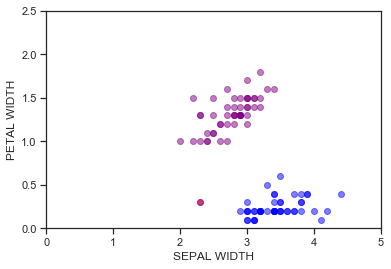

In [41]:
np.random.seed(19680801)
# Fixing random state for reproducibility
plt.scatter(df_setosa["sepal_width"], y = df_setosa["petal_width"], marker = 'o',color = 'blue', alpha=0.5)
plt.scatter(df_versi["sepal_width"], y = df_versi["petal_width"], marker ='o',color = 'purple', alpha=0.5)
plt.scatter(df2["sepal_width"],df2["petal_width"],marker = 'o', color = 'red', alpha = 0.5)
plt.xlabel("SEPAL WIDTH")
plt.ylabel("PETAL WIDTH")
plt.ylim(0,2.5)
plt.xlim(0,5)
plt.show()

In [42]:
def Predict_New_Value(X_new):
    pred_val = lin_model.predict(X_new)
    print("Prediction for new value = ", pred_val)
    if(pred_val == 1):
        pred_valstr = "Iris-Setosa"
    elif(pred_val == 0):
        pred_valstr = "Iris-Versicolor"
        
    return(pred_valstr)

X_new = [[4,0.7,16]]    
print("Predicted value for New Record = " , Predict_New_Value(X_new))

Prediction for new value =  [1]
Predicted value for New Record =  Iris-Setosa


In [43]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC()
lin_svm.fit(predictor_cols, target_col)

C:\Users\ram\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [44]:
print ("Accuracy = %.3f" % (metrics.accuracy_score(lin_svm.predict(predictor_cols), df.class_label)))
df2 = df[lin_svm.predict(predictor_cols)!=df.class_label]
print(df2)

Accuracy = 1.000
Empty DataFrame
Columns: [sepal_width, petal_width, class_label, SWidth_SQ]
Index: []


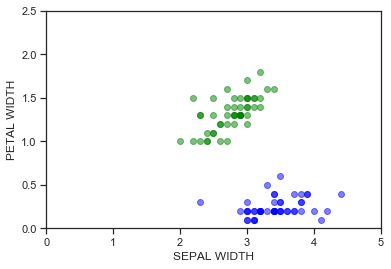

In [47]:
np.random.seed(19680801)
# Fixing random state for reproducibility
plt.scatter(df_setosa["sepal_width"], y = df_setosa["petal_width"], marker = 'o',color = 'blue', alpha=0.5)
plt.scatter(df_versi["sepal_width"], y = df_versi["petal_width"], marker ='o',color = 'green', alpha=0.5)
plt.scatter(df2["sepal_width"],df2["petal_width"],marker = 'o', color = 'red', alpha = 0.5)
plt.xlabel("SEPAL WIDTH")
plt.ylabel("PETAL WIDTH")
plt.ylim(0,2.5)
plt.xlim(0,5)
plt.show()

In [46]:
def Predict_New_Value_SVM(X_new):
    pred_val = lin_svm.predict(X_new)
    print("Prediction for new value = ", pred_val)
    if(pred_val == 1):
        pred_valstr = "Iris-Setosa"
    elif(pred_val == 0):
        pred_valstr = "Iris-Versicolor"
        
    return(pred_valstr)

X_new = [[4,0.7,16]]    
print("Predicted value for New Record = " , Predict_New_Value_SVM(X_new))

Prediction for new value =  [1]
Predicted value for New Record =  Iris-Setosa
